## Importing the Packages

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Importing the Data

In [2]:
raw_data = yfinance.download(tickers= "VOW3.DE, PAH3.DE, BMW.DE", interval= "1d", group_by="ticker", auto_adjust= True, tread= True)

[*********************100%***********************]  3 of 3 completed


In [3]:
df=raw_data.copy()

## Defining Key Dates

In [4]:
# Starting Date
start_date="2009-04-05"
# First Official Announcement - 49.9%
ann_1 = "2009-12-09"
# Second Official Announcement - 51.1%
ann_2= "2012-07-05"
#Ending Date
end_date="2015-01-01"
# Dieselgate
diesel_gate="2015-09-20"
# Ending Date for Diesel Gate
dg_end_date='2016-10-20'

## Pre-processing the Data

In [5]:
# Extracting Closing Prices
df["vol"]=df['VOW3.DE'].Close
df["por"]=df['PAH3.DE'].Close
df["bmw"]=df['BMW.DE'].Close
# Creating Returns
df["ret_vol"]=df['vol'].pct_change(1).mul(100)
df["ret_por"]=df['por'].pct_change(1).mul(100)
df["ret_bmw"]=df['bmw'].pct_change(1).mul(100)
# Creating Squared Returns
df["2ret_vol"]=df['vol'].pct_change(1).mul(df.ret_vol)
df["2ret_por"]=df['por'].pct_change(1).mul(df.ret_por)
df["2ret_bmw"]=df['bmw'].pct_change(1).mul(df.ret_bmw)
# Extracting Volume
df['q_vol']=df['VOW3.DE'].Volume
df['q_por']=df['PAH3.DE'].Volume
df['q_bmw']=df['BMW.DE'].Volume

In [6]:
# Assigning the Frequency and Filling NA Values
df = df.asfreq('b')
df = df.fillna(method = 'bfill')

In [7]:
# Removing Surplus Data
del df['BMW.DE']
del df['PAH3.DE']
del df['VOW3.DE']

## Plotting the Prices

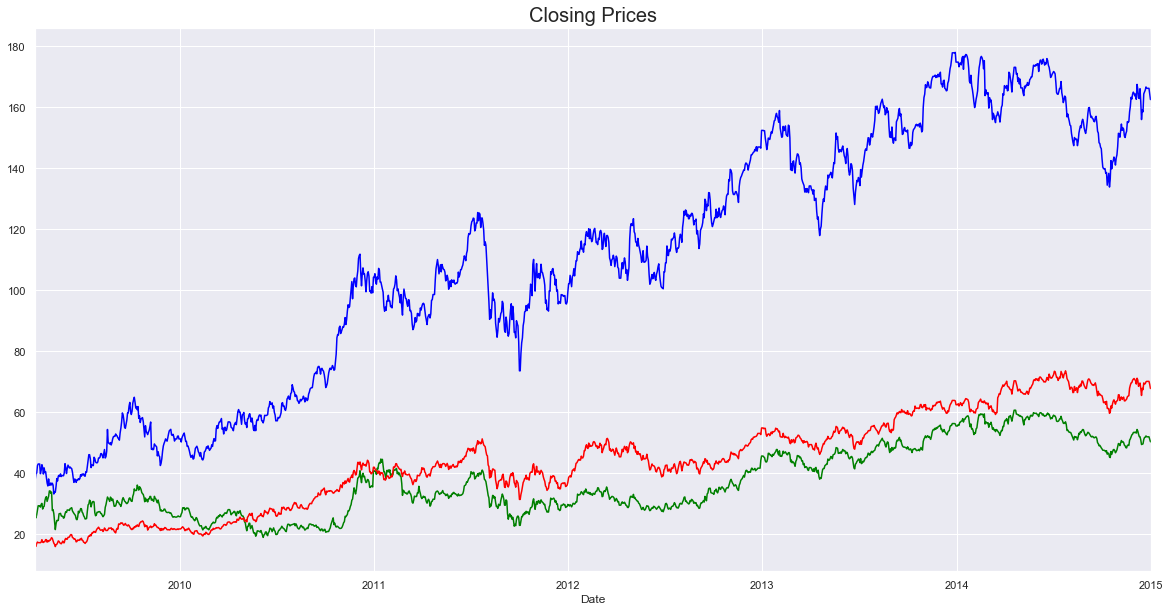

In [8]:
df['vol'][start_date:end_date].plot(figsize=(20,10),color='blue')
df['por'][start_date:end_date].plot(color='green')
df['bmw'][start_date:end_date].plot(color='red')
plt.title('Closing Prices', size=20)
plt.show()

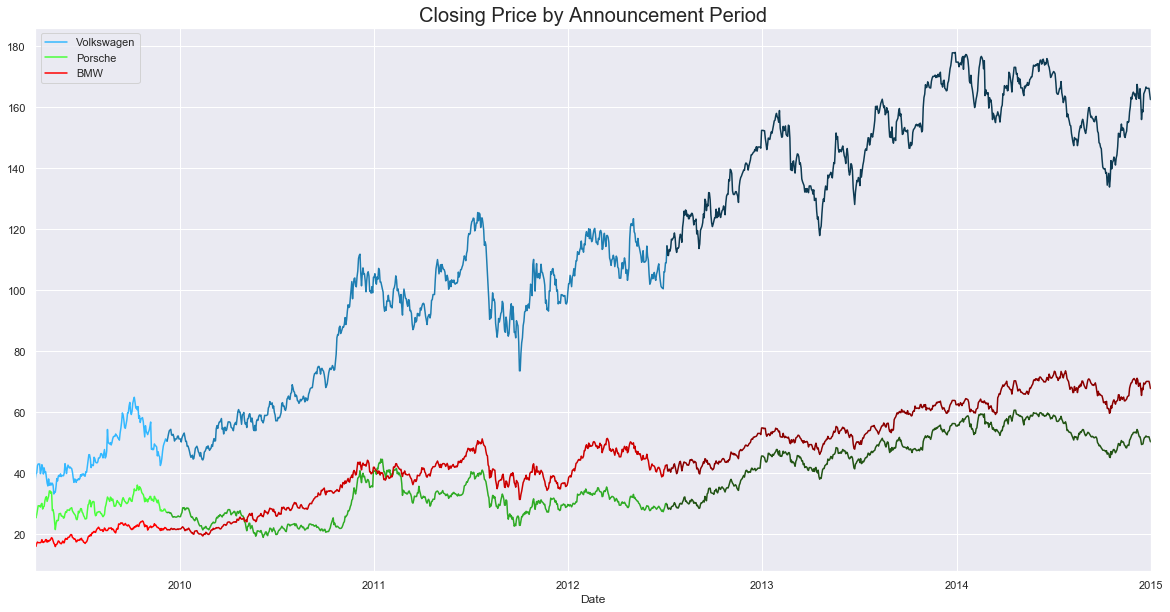

In [9]:
df['vol'][start_date:ann_1].plot(figsize=(20,10),color='#33B8FF')
df['por'][start_date:ann_1].plot(color='#49FF3A')
df['bmw'][start_date:ann_1].plot(color='#FF0000')

df['vol'][ann_1:ann_2].plot(color='#1E7EB2')
df['por'][ann_1:ann_2].plot(color='#2FAB25')
df['bmw'][ann_1:ann_2].plot(color='#CD0000')

df['vol'][ann_2:end_date].plot(color='#0E3A52')
df['por'][ann_2:end_date].plot(color='#225414')
df['bmw'][ann_2:end_date].plot(color='#8B0000')

plt.title('Closing Price by Announcement Period', size=20)
plt.legend(['Volkswagen', 'Porsche', 'BMW'])
plt.show()

## Correlation

In [10]:
print("Correlation among manufacturers from " + str(start_date) + ' to ' + str(end_date) + '\n')

print('Volkswagen and Porsche correlation: \t' + str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))

print('Volkswagen and BMW correlation: \t' + str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

print('Porsche and BMW correlation: \t\t' + str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

Correlation among manufacturers from 2009-04-05 to 2015-01-01

Volkswagen and Porsche correlation: 	0.886308503147584
Volkswagen and BMW correlation: 	0.9713561403514728
Porsche and BMW correlation: 		0.8880729994890912


In [11]:
print("Correlation among manufacturers from " + str(start_date) + ' to ' + str(ann_1) + '\n')

print('Volkswagen and Porsche correlation: \t' + str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))

print('Volkswagen and BMW correlation: \t' + str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

print('Porsche and BMW correlation: \t\t' + str(df['por'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

Correlation among manufacturers from 2009-04-05 to 2009-12-09

Volkswagen and Porsche correlation: 	0.6633400817761245
Volkswagen and BMW correlation: 	0.842835347467531
Porsche and BMW correlation: 		0.6095045685009073


In [12]:
print("Correlation among manufacturers from " + str(ann_1) + ' to ' + str(ann_2) + '\n')

print('Volkswagen and Porsche correlation: \t' + str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))

print('Volkswagen and BMW correlation: \t' + str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

print('Porsche and BMW correlation: \t\t' + str(df['por'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

Correlation among manufacturers from 2009-12-09 to 2012-07-05

Volkswagen and Porsche correlation: 	0.7422114347356785
Volkswagen and BMW correlation: 	0.9795942993967812
Porsche and BMW correlation: 		0.7035985449323023


In [13]:
print("Correlation among manufacturers from " + str(ann_2) + ' to ' + str(end_date) + '\n')

print('Volkswagen and Porsche correlation: \t' + str(df['vol'][ann_2:end_date].corr(df['por'][ann_2:end_date])))

print('Volkswagen and BMW correlation: \t' + str(df['vol'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))

print('Porsche and BMW Correlation: \t\t' + str(df['por'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))

Correlation among manufacturers from 2012-07-05 to 2015-01-01

Volkswagen and Porsche correlation: 	0.9465576185566056
Volkswagen and BMW correlation: 	0.8472303914511872
Porsche and BMW Correlation: 		0.9132323189838413


In [14]:
print("Correlation among manufacturers from " + str(end_date) + ' to ' + str(df.index[-1]) + '\n')

print('Volkswagen and Porsche correlation: \t' + str(df['vol'][end_date:].corr(df['por'][end_date:])))

print('Volkswagen and BMW correlation: \t' + str(df['vol'][end_date:].corr(df['bmw'][end_date:])))

print('Porsche and BMW correlation: \t\t' + str(df['por'][end_date:].corr(df['bmw'][end_date:])))

Correlation among manufacturers from 2015-01-01 to 2020-07-23 00:00:00

Volkswagen and Porsche correlation: 	0.9450390759186332
Volkswagen and BMW correlation: 	0.5691199659404435
Porsche and BMW correlation: 		0.5130311337531018


In [15]:
print("Correlation among manufacturers from " + str(end_date) + ' to ' + str('2015-09-20') + '\n')

print('Volkswagen and Porsche correlation: \t' + str(df['vol'][end_date:diesel_gate].corr(df['por'][end_date:diesel_gate])))

print('Volkswagen and BMW correlation: \t' + str(df['vol'][end_date:diesel_gate].corr(df['bmw'][end_date:diesel_gate])))

print('Porsche and BMW correlation: \t\t' + str(df['por'][end_date:diesel_gate].corr(df['bmw'][end_date:diesel_gate])))

Correlation among manufacturers from 2015-01-01 to 2016-10-20

Volkswagen and Porsche correlation: 	0.9923676020666576
Volkswagen and BMW correlation: 	0.961382135210234
Porsche and BMW correlation: 		0.9631012462830851


In [16]:
print("Correlation among manufacturers from " + str(diesel_gate) + ' to ' + str('2016-10-20') + '\n')

print('Volkswagen and Porsche correlation: \t' + str(df['vol'][diesel_gate:dg_end_date].corr(df['por'][diesel_gate:dg_end_date])))

print('Volkswagen and BMW correlation: \t' + str(df['vol'][diesel_gate:dg_end_date].corr(df['bmw'][diesel_gate:dg_end_date])))

print('Porscheand BMW Correlation: \t\t' + str(df['por'][diesel_gate:dg_end_date].corr(df['bmw'][diesel_gate:dg_end_date])))

Correlation among manufacturers from 2015-09-20 to dg_end_date

Volkswagen and Porsche correlation: 	0.9486407176234668
Volkswagen and BMW correlation: 	0.11365626776463127
Porscheand BMW Correlation: 		-0.006428802213832843


## Best Fitting Models

### For Volkswagen

In [17]:
mod_pr_pre_vol= auto_arima(df.vol[start_date:ann_1], exogenous=df[['por','bmw']][start_date:ann_1], m=5, max_p=5, max_q=5)

mod_pr_btn_vol= auto_arima(df.vol[ann_1:ann_2], exogenous=df[['por','bmw']][ann_1:ann_2], m=5, max_p=5, max_q=5)

mod_pr_post_vol=auto_arima(df.vol[ann_2:end_date], exogenous=df[['por','bmw']][ann_2:end_date], m=5, max_p=5, max_q=5)

In [18]:
#Pre first announcement ARIMA model
mod_pr_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -329.605
Date:                Sun, 19 Jul 2020   AIC                            669.210
Time:                        22:06:03   BIC                            685.119
Sample:                    04-06-2009   HQIC                           675.661
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7502      0.464      1.618      0.106      -0.159       1.659
por            0.4141      0.099      4.169      0.000       0.219       0.609
bmw            0.6858      0.325      2.108      0.035       0.048       1.324
ar.L1          0.9634      0.020     48.676      0.000       0.925       1.002
sigma2         2.3414      0.159     14.719      0.000       2.030       2.653
===================================================================================
Ljung-Box (Q):                       38.25   Jarque-Bera (JB):               166.09
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.52
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
#Between announcement ARIMA model
mod_pr_btn_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  672
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 5)   Log Likelihood               -1095.678
Date:                           Sun, 19 Jul 2020   AIC                           2207.356
Time:                                   22:06:03   BIC                           2243.426
Sample:                               12-09-2009   HQIC                          2221.326
                                    - 07-05-2012                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0040      0.001      3.649      0.000       0.002       0.006
por            0.8131      0.064     12.738      0.000       0.688       0.938
bmw            1.5496      0.072     21.477      0.000       1.408       1.691
ar.L1          0.9419      0.015     63.278      0.000       0.913       0.971
ma.L1         -0.9996      0.078    -12.878      0.000      -1.152      -0.847
ar.S.L5       -0.9946      0.059    -16.974      0.000      -1.109      -0.880
ma.S.L5        0.9907      0.073     13.603      0.000       0.848       1.133
sigma2         1.5264      0.146     10.468      0.000       1.241       1.812
===================================================================================
Ljung-Box (Q):                       25.56   Jarque-Bera (JB):                89.47
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
#Post announcements ARIMA model
mod_pr_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  651
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1001.321
Date:                Sun, 19 Jul 2020   AIC                           2008.642
Time:                        22:06:03   BIC                           2022.072
Sample:                    07-05-2012   HQIC                          2013.851
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            1.8862      0.042     44.721      0.000       1.804       1.969
bmw            0.6922      0.061     11.395      0.000       0.573       0.811
sigma2         1.2752      0.049     26.116      0.000       1.179       1.371
===================================================================================
Ljung-Box (Q):                       30.15   Jarque-Bera (JB):               160.05
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### For Porsche

In [21]:
mod_pr_pre_por= auto_arima(df.por[start_date:ann_1], exogenous=df[['vol','bmw']][start_date:ann_1], m=5, max_p=5, max_q=5)

mod_pr_btn_por= auto_arima(df.por[ann_1:ann_2], exogenous=df[['vol','bmw']][ann_1:ann_2], m=5, max_p=5, max_q=5)

mod_pr_post_por=auto_arima(df.por[ann_2:end_date], exogenous=df[['vol','bmw']][ann_2:end_date], m=5, max_p=5, max_q=5)

In [22]:
mod_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -226.231
Date:                Sun, 19 Jul 2020   AIC                            464.462
Time:                        22:06:19   BIC                            483.553
Sample:                    04-06-2009   HQIC                           472.204
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5770      0.376      1.533      0.125      -0.161       1.315
vol            0.1111      0.051      2.157      0.031       0.010       0.212
bmw            0.8440      0.152      5.557      0.000       0.546       1.142
ar.L1          1.0747      0.059     18.193      0.000       0.959       1.191
ar.L2         -0.1589      0.059     -2.716      0.007      -0.274      -0.044
sigma2         0.7354      0.052     14.098      0.000       0.633       0.838
===================================================================================
Ljung-Box (Q):                       26.01   Jarque-Bera (JB):               559.41
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
mod_pr_btn_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -581.705
Date:                Sun, 19 Jul 2020   AIC                           1173.410
Time:                        22:06:19   BIC                           1195.954
Sample:                    12-09-2009   HQIC                          1182.142
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0210      0.022     -0.937      0.349      -0.065       0.023
vol            0.1740      0.016     11.219      0.000       0.144       0.204
bmw            0.3099      0.044      7.022      0.000       0.223       0.396
ar.L1          0.0712      0.030      2.343      0.019       0.012       0.131
sigma2         0.3315      0.010     32.515      0.000       0.312       0.352
===================================================================================
Ljung-Box (Q):                       35.66   Jarque-Bera (JB):              1072.22
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             0.07
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  651
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -335.182
Date:                Sun, 19 Jul 2020   AIC                            676.363
Time:                        22:06:19   BIC                            689.794
Sample:                    07-05-2012   HQIC                           681.573
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.2429      0.008     28.916      0.000       0.226       0.259
bmw            0.1509      0.019      8.022      0.000       0.114       0.188
sigma2         0.1642      0.005     31.677      0.000       0.154       0.174
===================================================================================
Ljung-Box (Q):                       41.89   Jarque-Bera (JB):               526.88
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions for the Future

### For Porsche

In [25]:
model_test1=auto_arima(df.vol[start_date:ann_1], exogenous=df[['bmw']][start_date:ann_1], m=5, max_p=5,max_q=5,max_P=5, max_Q=5, trend='ct')

model_test2= auto_arima(df.vol[start_date:ann_1], exogenous = df[['por', 'bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

### For Volkswagen

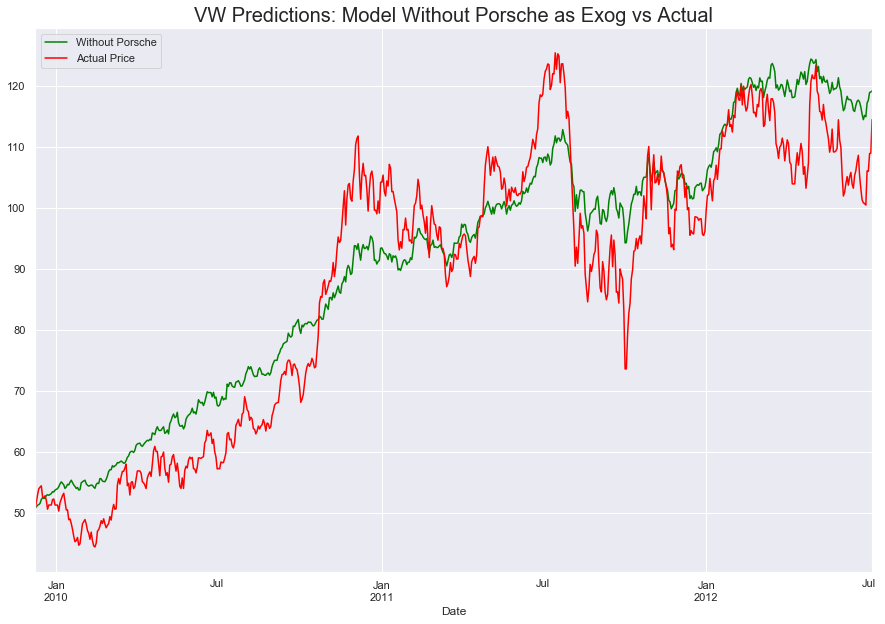

In [26]:

model_test1_pred=pd.DataFrame(model_test1.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)

model_test2_pred=pd.DataFrame(model_test2.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['bmw','por']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)

model_test1_pred.plot(figsize=(15,10), color='green')
df.vol[ann_1:ann_2].plot(color='red')

plt.title('VW Predictions: Model Without Porsche as Exog vs Actual', size=20)
plt.legend(['Without Porsche', 'Actual Price'])
plt.show()

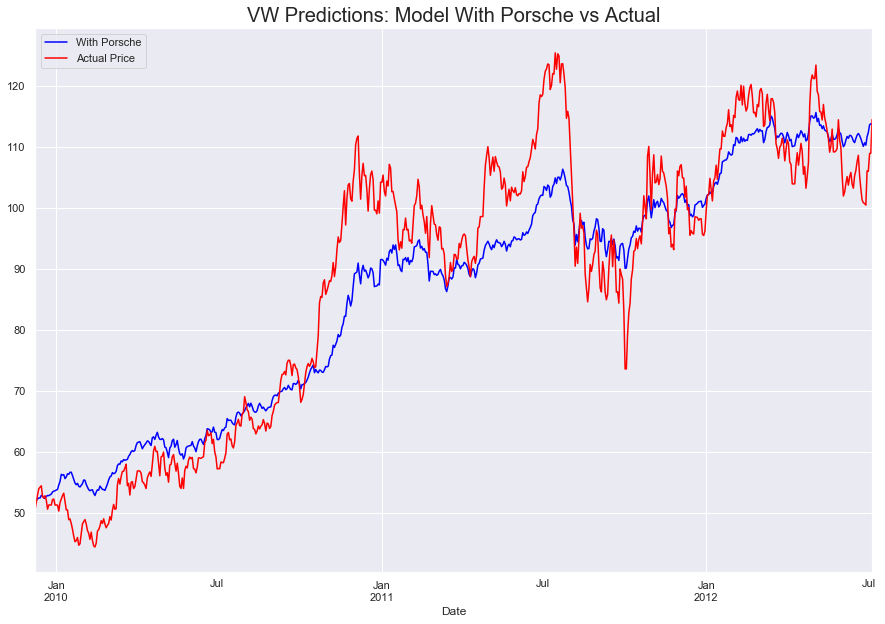

In [27]:
model_test2_pred.plot(figsize=(15,10),color='blue')
df.vol[ann_1:ann_2].plot(color='red')

plt.title('VW Predictions: Model With Porsche vs Actual', size=20)
plt.legend(['With Porsche', 'Actual Price'])
plt.show()

In [28]:
model_test3=auto_arima(df.vol[ann_1:ann_2], exogenous=df[['bmw']][ann_1:ann_2], m=5, max_p=5,max_q=5,max_P=5, max_Q=5, trend='ct')

model_test4= auto_arima(df.vol[ann_1:ann_2], exogenous = df[['por', 'bmw']][ann_1:ann_2],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

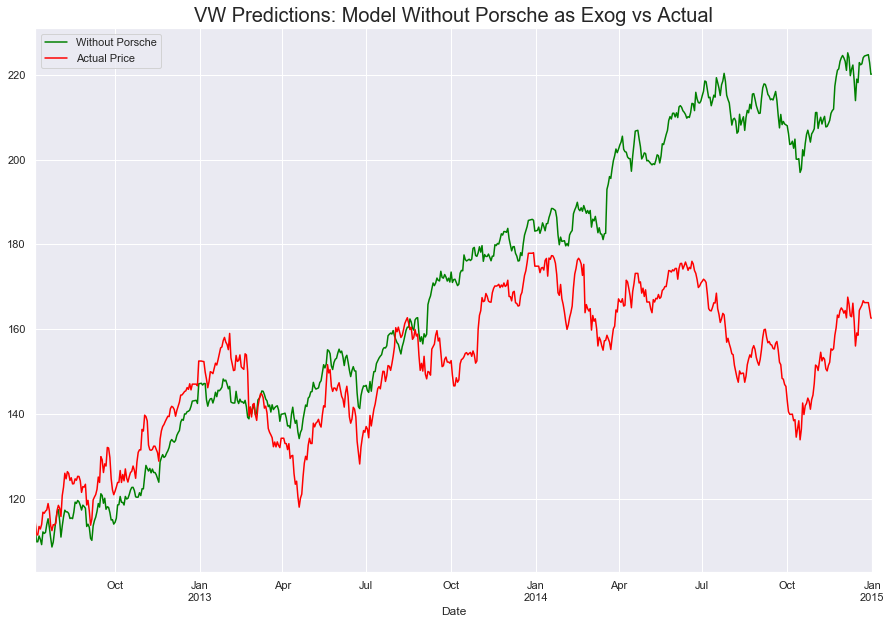

In [29]:
model_test3_post=pd.DataFrame(model_test3.predict(n_periods = len(df[ann_2:end_date]), exogenous = df[['bmw']][ann_2:end_date]),
                               index = df[ann_2:end_date].index)

model_test4_post=pd.DataFrame(model_test4.predict(n_periods = len(df[ann_2:end_date]), exogenous = df[['bmw','por']][ann_2:end_date]),
                               index = df[ann_2:end_date].index)

model_test3_post.plot(figsize=(15,10), color='green')
df.vol[ann_2:end_date].plot(color='red')

plt.title('VW Predictions: Model Without Porsche as Exog vs Actual', size=20)
plt.legend(['Without Porsche', 'Actual Price'])
plt.show()

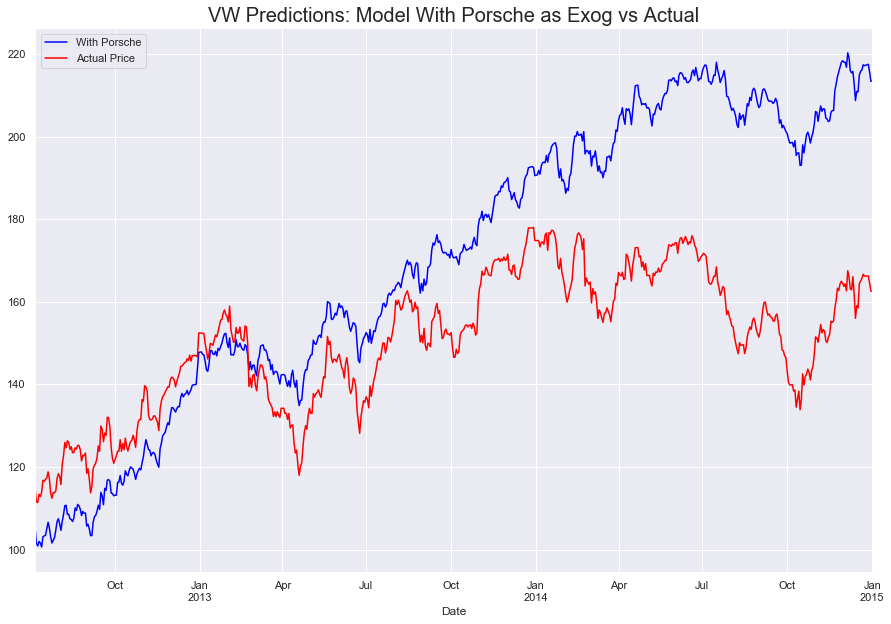

In [30]:
model_test4_post.plot(figsize=(15,10), color='blue')
df.vol[ann_2:end_date].plot(color='red')

plt.title('VW Predictions: Model With Porsche as Exog vs Actual', size=20)
plt.legend(['With Porsche', 'Actual Price'])
plt.show()

In [31]:
model_test5=auto_arima(df.vol[end_date:diesel_gate], exogenous=df[['bmw']][end_date:diesel_gate], m=5, max_p=5,max_q=5,max_P=5, max_Q=5, trend='ct')

model_test6= auto_arima(df.vol[end_date:diesel_gate], exogenous = df[['por', 'bmw']][end_date:diesel_gate],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

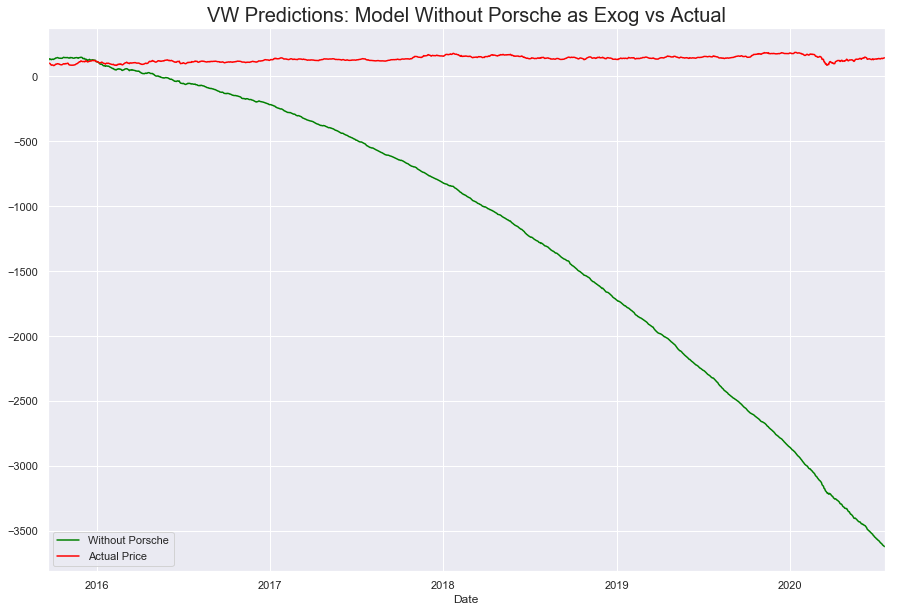

In [32]:
model_test5_dg=pd.DataFrame(model_test5.predict(n_periods = len(df[diesel_gate:]), exogenous = df[['bmw']][diesel_gate:]),
                               index = df[diesel_gate:].index)

model_test6_dg=pd.DataFrame(model_test6.predict(n_periods = len(df[diesel_gate:]), exogenous = df[['bmw','por']][diesel_gate:]),
                               index = df[diesel_gate:].index)

model_test5_dg.plot(figsize=(15,10), color='green')
df.vol[diesel_gate:].plot(color='red')

plt.title('VW Predictions: Model Without Porsche as Exog vs Actual', size=20)
plt.legend(['Without Porsche', 'Actual Price'])
plt.show()

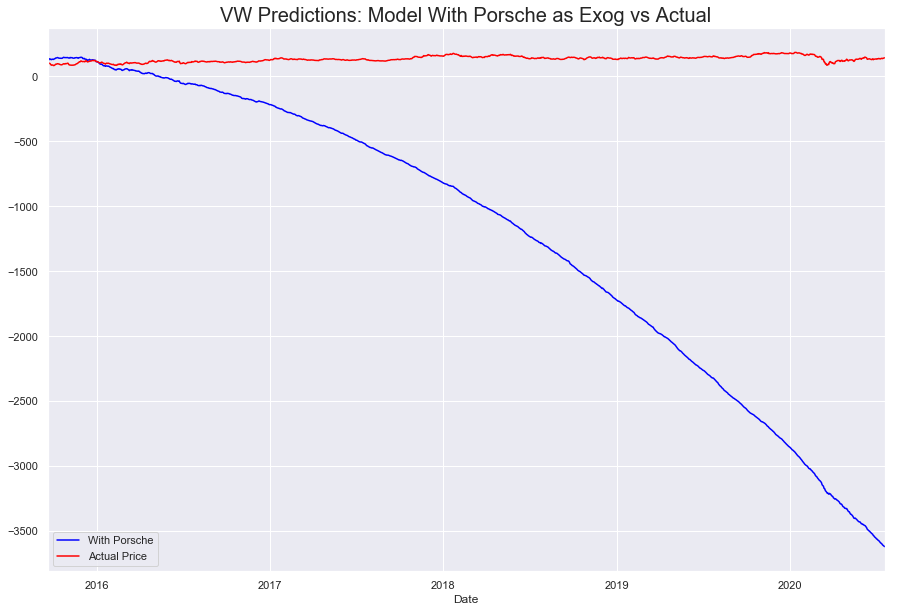

In [33]:
model_test5_dg.plot(figsize=(15,10), color='blue')
df.vol[diesel_gate:].plot(color='red')

plt.title('VW Predictions: Model With Porsche as Exog vs Actual', size=20)
plt.legend(['With Porsche', 'Actual Price'])
plt.show()

## Volatility

### Volatility of VW for Each Period

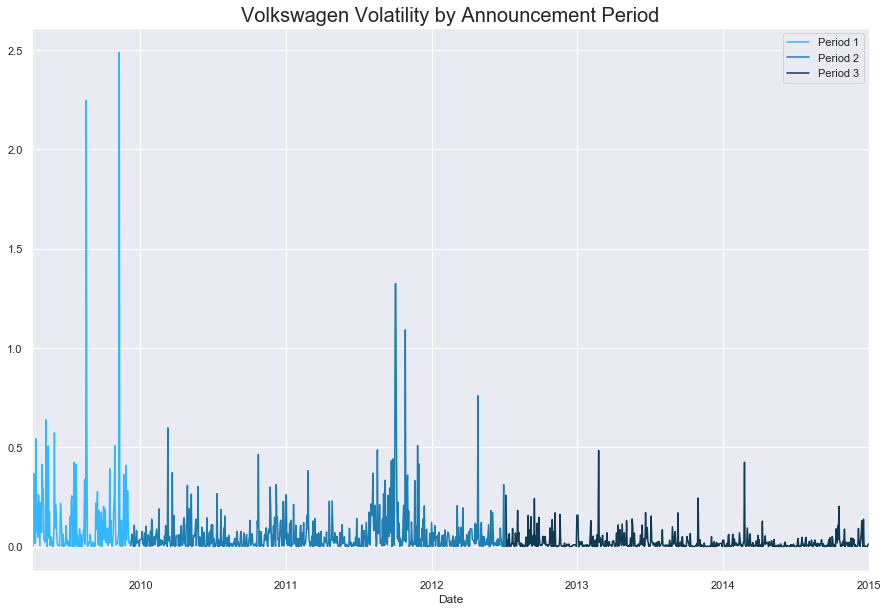

In [34]:
df['2ret_vol'][start_date:ann_1].plot(figsize = (15,10), color = "#33B8FF")
df['2ret_vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['2ret_vol'][ann_2:end_date].plot(color = "#0E3A52")
plt.legend(['Period 1', "Period 2", "Period 3"])
plt.title('Volkswagen Volatility by Announcement Period', size=20)
plt.show()

### Volatility Trends for Each Period

In [35]:
model_garch_pre = arch_model(df.ret_vol[start_date:ann_1], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_pre = model_garch_pre.fit(update_freq = 5)

model_garch_btn = arch_model(df.ret_vol[ann_1:ann_2], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_btn = model_garch_btn.fit(update_freq = 5)

model_garch_post = arch_model(df.ret_vol[ann_2:end_date], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_post = model_garch_post.fit(update_freq = 5)

Iteration:      5,   Func. Count:     31,   Neg. LLF: 475.77863486010153
Iteration:     10,   Func. Count:     56,   Neg. LLF: 475.0042567815509
Iteration:     15,   Func. Count:     80,   Neg. LLF: 474.9915210237318
Optimization terminated successfully    (Exit mode 0)
            Current function value: 474.9915209714288
            Iterations: 15
            Function evaluations: 80
            Gradient evaluations: 15
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1526.753626172028
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1526.7316954368202
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1526.731695435576
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1167.7465354548053
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1167.0850453012679
            Iterations: 9
            

In [36]:
results_garch_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -474.992
Distribution:                  Normal   AIC:                           957.983
Method:            Maximum Likelihood   BIC:                           970.710
                                        No. Observations:                  178
Date:                Sun, Jul 19 2020   Df Residuals:                      174
Time:                        22:07:10   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1571      0.266      0.590      0.556 [ -0.365,  0.679]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         10.6195      4.227      2.512  1.200e-02    [  2.334, 18.905]
alpha[1]       0.1540  9.197e-02      1.675  9.401e-02 [-2.624e-02,  0.334]
beta[1]        0.0000      0.349      0.000      1.000    [ -0.684,  0.684]
===========================================================================

Covariance estimator: robust
"""

In [37]:
results_garch_btn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1526.73
Distribution:                  Normal   AIC:                           3061.46
Method:            Maximum Likelihood   BIC:                           3079.50
                                        No. Observations:                  672
Date:                Sun, Jul 19 2020   Df Residuals:                      668
Time:                        22:07:10   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1892  8.634e-02      2.191  2.843e-02 [1.998e-02,  0.358]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1679  7.914e-02      2.122  3.388e-02 [1.279e-02,  0.323]
alpha[1]       0.0688  1.682e-02      4.091  4.301e-05 [3.585e-02,  0.102]
beta[1]        0.9040  2.108e-02     42.883      0.000   [  0.863,  0.945]
==========================================================================

Covariance estimator: robust
"""

In [38]:
results_garch_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1167.09
Distribution:                  Normal   AIC:                           2342.17
Method:            Maximum Likelihood   BIC:                           2360.08
                                        No. Observations:                  651
Date:                Sun, Jul 19 2020   Df Residuals:                      647
Time:                        22:07:10   Df Model:                            4
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1076  6.080e-02      1.770  7.677e-02 [-1.157e-02,  0.227]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.4839      0.362      1.335      0.182    [ -0.226,  1.194]
alpha[1]       0.1594      0.105      1.515      0.130 [-4.676e-02,  0.366]
beta[1]        0.6268      0.225      2.785  5.349e-03    [  0.186,  1.068]
===========================================================================

Covariance estimator: robust
"""

### Volatility Trends for Porsche

In [39]:
model_garch_por_pre = arch_model(df.ret_por[start_date:ann_1], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_por_pre = model_garch_por_pre.fit(update_freq = 5)

model_garch_por_btn = arch_model(df.ret_por[ann_1:ann_2], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_por_btn = model_garch_por_btn.fit(update_freq = 5)

model_garch_por_post = arch_model(df.ret_por[ann_2:end_date], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_por_post = model_garch_por_post.fit(update_freq = 5)

Iteration:      5,   Func. Count:     33,   Neg. LLF: 501.92318023664643
Iteration:     10,   Func. Count:     62,   Neg. LLF: 470.7433650585271
Iteration:     15,   Func. Count:     88,   Neg. LLF: 469.3204160972816
Optimization terminated successfully    (Exit mode 0)
            Current function value: 469.3204145998985
            Iterations: 17
            Function evaluations: 97
            Gradient evaluations: 17
Iteration:      5,   Func. Count:     35,   Neg. LLF: 1806.1996379703007
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1620.0095817170836
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1783.768318765039
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1227.1164904602902
Iteration:     15,   Func. Count:    100,   Neg. LLF: 30817.504446078907
Iteration:     20,   Func. Count:    135,   Neg. LLF: 1223.2192958188339
Op

In [40]:
results_garch_por_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_por   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:               -469.320
Distribution:                  Normal   AIC:                           946.641
Method:            Maximum Likelihood   BIC:                           959.368
                                        No. Observations:                  178
Date:                Sun, Jul 19 2020   Df Residuals:                      174
Time:                        22:07:10   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0394      0.258      0.153      0.879 [ -0.466,  0.544]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0000      0.107      0.000      1.000      [ -0.210,  0.210]
alpha[1]       0.0000  2.063e-02      0.000      1.000 [-4.043e-02,4.043e-02]
beta[1]        0.9920  2.775e-02     35.747 7.345e-280      [  0.938,  1.046]
=============================================================================

Covariance estimator: robust
"""

In [41]:
results_garch_por_btn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_por   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1620.01
Distribution:                  Normal   AIC:                           3248.02
Method:            Maximum Likelihood   BIC:                           3266.06
                                        No. Observations:                  672
Date:                Sun, Jul 19 2020   Df Residuals:                      668
Time:                        22:07:10   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0612  9.671e-02      0.632      0.527 [ -0.128,  0.251]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1748  8.951e-02      1.953  5.088e-02 [-6.672e-04,  0.350]
alpha[1]       0.0702  2.162e-02      3.245  1.173e-03  [2.779e-02,  0.113]
beta[1]        0.9107  2.511e-02     36.275 3.946e-288    [  0.862,  0.960]
===========================================================================

Covariance estimator: robust
"""

In [42]:
results_garch_por_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_por   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1222.80
Distribution:                  Normal   AIC:                           2453.60
Method:            Maximum Likelihood   BIC:                           2471.51
                                        No. Observations:                  651
Date:                Sun, Jul 19 2020   Df Residuals:                      647
Time:                        22:07:10   Df Model:                            4
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0836  6.179e-02      1.352      0.176 [-3.755e-02,  0.205]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.4742e-13  3.502e-03  1.563e-10      1.000 [-6.864e-03,6.864e-03]
alpha[1]   9.8357e-13  8.948e-04  1.099e-09      1.000 [-1.754e-03,1.754e-03]
beta[1]        0.9986  1.029e-03    970.267      0.000      [  0.997,  1.001]
=============================================================================

Covariance estimator: robust
"""

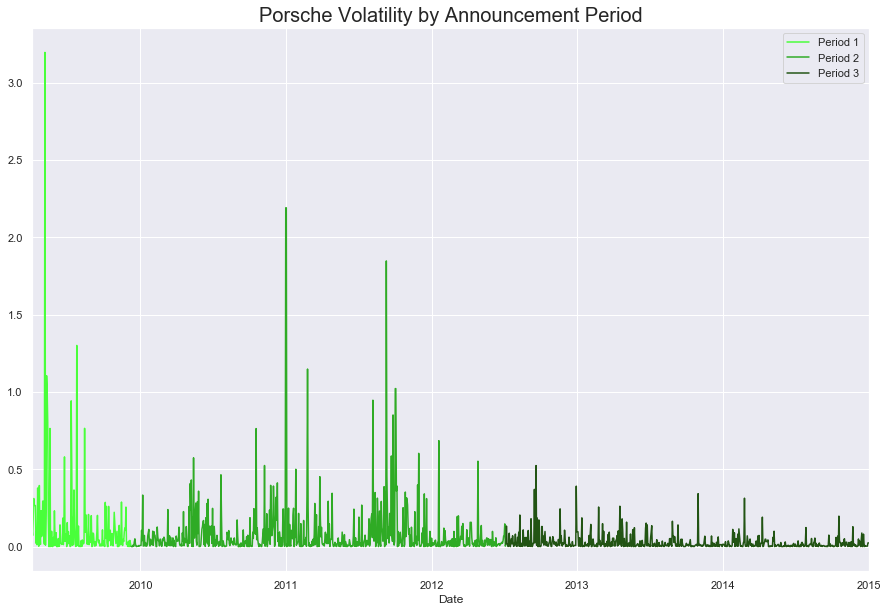

In [43]:
df['2ret_por'][start_date:ann_1].plot(figsize = (15,10), color = '#49FF3A')
df['2ret_por'][ann_1:ann_2].plot(color = '#2FAB25') 
df['2ret_por'][ann_2:end_date].plot(color = '#225414')
plt.legend(['Period 1', "Period 2", "Period 3"])
plt.title('Porsche Volatility by Announcement Period', size=20)
plt.show()

### Volatility After Diesel Gate

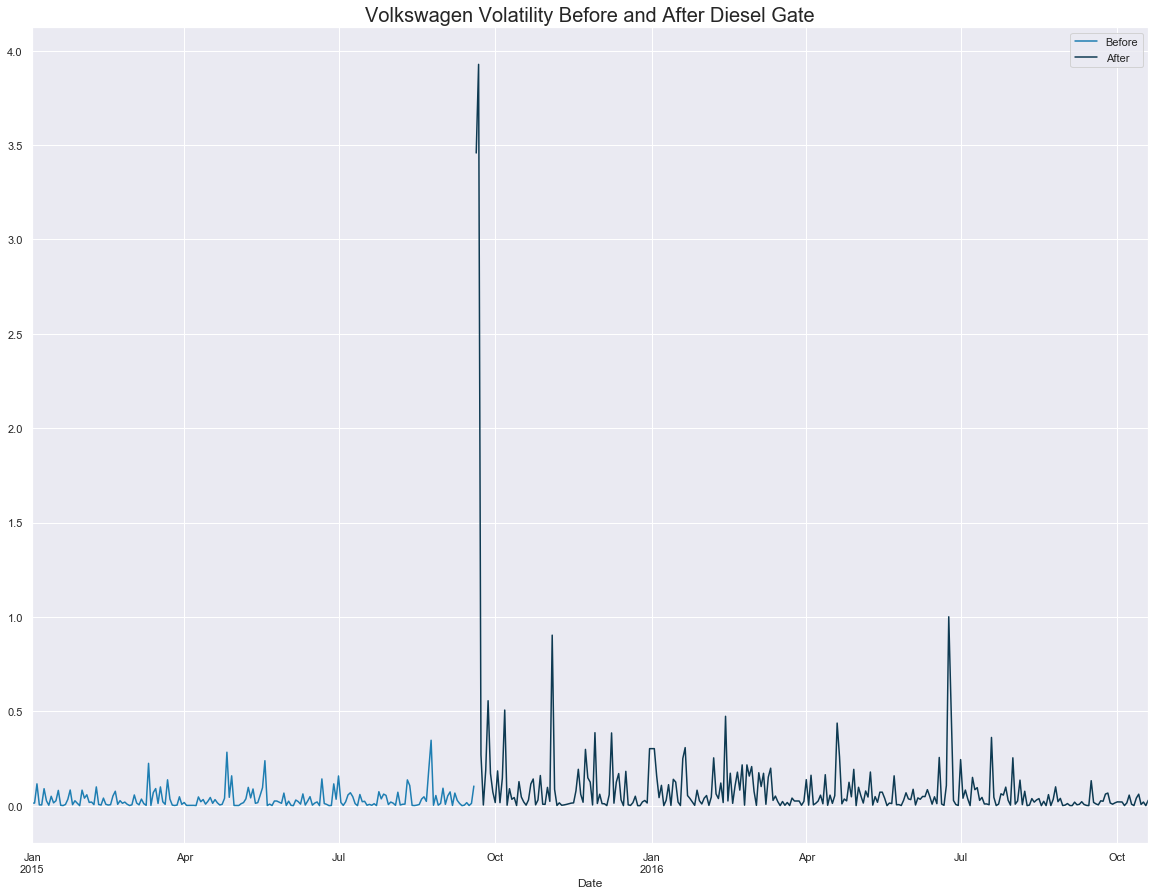

In [44]:
df['2ret_vol'][end_date:diesel_gate].plot(figsize=(20,15),color = "#1E7EB2")
df['2ret_vol'][diesel_gate:dg_end_date].plot(color = "#0E3A52")
plt.legend(['Before', "After"])
plt.title('Volkswagen Volatility Before and After Diesel Gate', size=20)
plt.show()

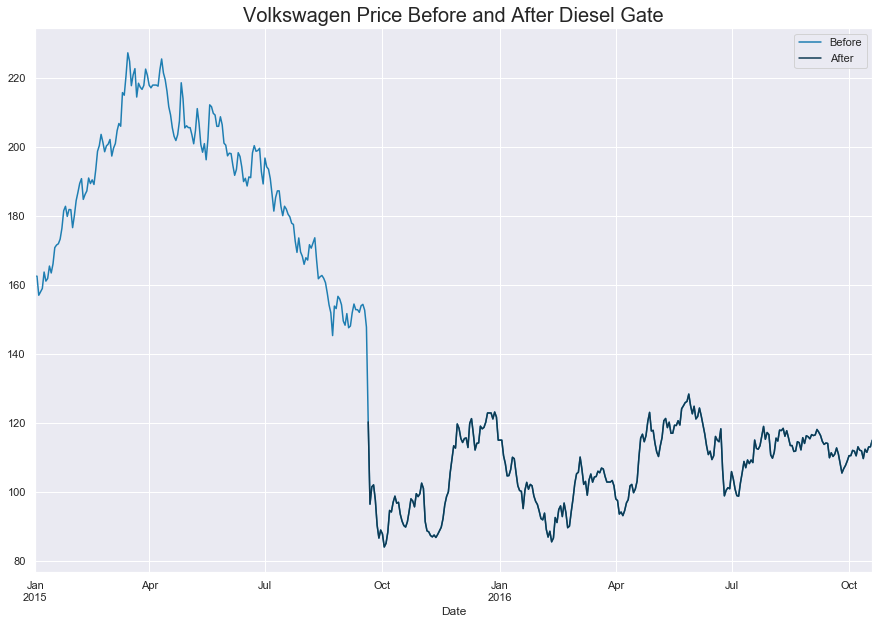

In [45]:
df.vol[end_date:dg_end_date].plot(figsize=(15,10), color= "#1E7EB2")
df.vol[diesel_gate:dg_end_date].plot(color = "#0E3A52")
plt.legend(['Before', "After"])
plt.title('Volkswagen Price Before and After Diesel Gate', size=20)
plt.show()

In [46]:
vw_garch_predg = arch_model(df.ret_vol[start_date:ann_1], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_predg = vw_garch_predg.fit(update_freq = 5)

vw_garch_postdg = arch_model(df.ret_vol[ann_1:ann_2], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
vw_garch_postdg = vw_garch_postdg.fit(update_freq = 5)

Iteration:      5,   Func. Count:     31,   Neg. LLF: 475.77863486010153
Iteration:     10,   Func. Count:     56,   Neg. LLF: 475.0042567815509
Iteration:     15,   Func. Count:     80,   Neg. LLF: 474.9915210237318
Optimization terminated successfully    (Exit mode 0)
            Current function value: 474.9915209714288
            Iterations: 15
            Function evaluations: 80
            Gradient evaluations: 15
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1526.753626172028
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1526.7316954368202
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1526.731695435576
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


In [47]:
results_garch_predg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -474.992
Distribution:                  Normal   AIC:                           957.983
Method:            Maximum Likelihood   BIC:                           970.710
                                        No. Observations:                  178
Date:                Sun, Jul 19 2020   Df Residuals:                      174
Time:                        22:07:13   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1571      0.266      0.590      0.556 [ -0.365,  0.679]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         10.6195      4.227      2.512  1.200e-02    [  2.334, 18.905]
alpha[1]       0.1540  9.197e-02      1.675  9.401e-02 [-2.624e-02,  0.334]
beta[1]        0.0000      0.349      0.000      1.000    [ -0.684,  0.684]
===========================================================================

Covariance estimator: robust
"""

In [48]:
vw_garch_postdg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1526.73
Distribution:                  Normal   AIC:                           3061.46
Method:            Maximum Likelihood   BIC:                           3079.50
                                        No. Observations:                  672
Date:                Sun, Jul 19 2020   Df Residuals:                      668
Time:                        22:07:13   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1892  8.634e-02      2.191  2.843e-02 [1.998e-02,  0.358]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1679  7.914e-02      2.122  3.388e-02 [1.279e-02,  0.323]
alpha[1]       0.0688  1.682e-02      4.091  4.301e-05 [3.585e-02,  0.102]
beta[1]        0.9040  2.108e-02     42.883      0.000   [  0.863,  0.945]
==========================================================================

Covariance estimator: robust
"""

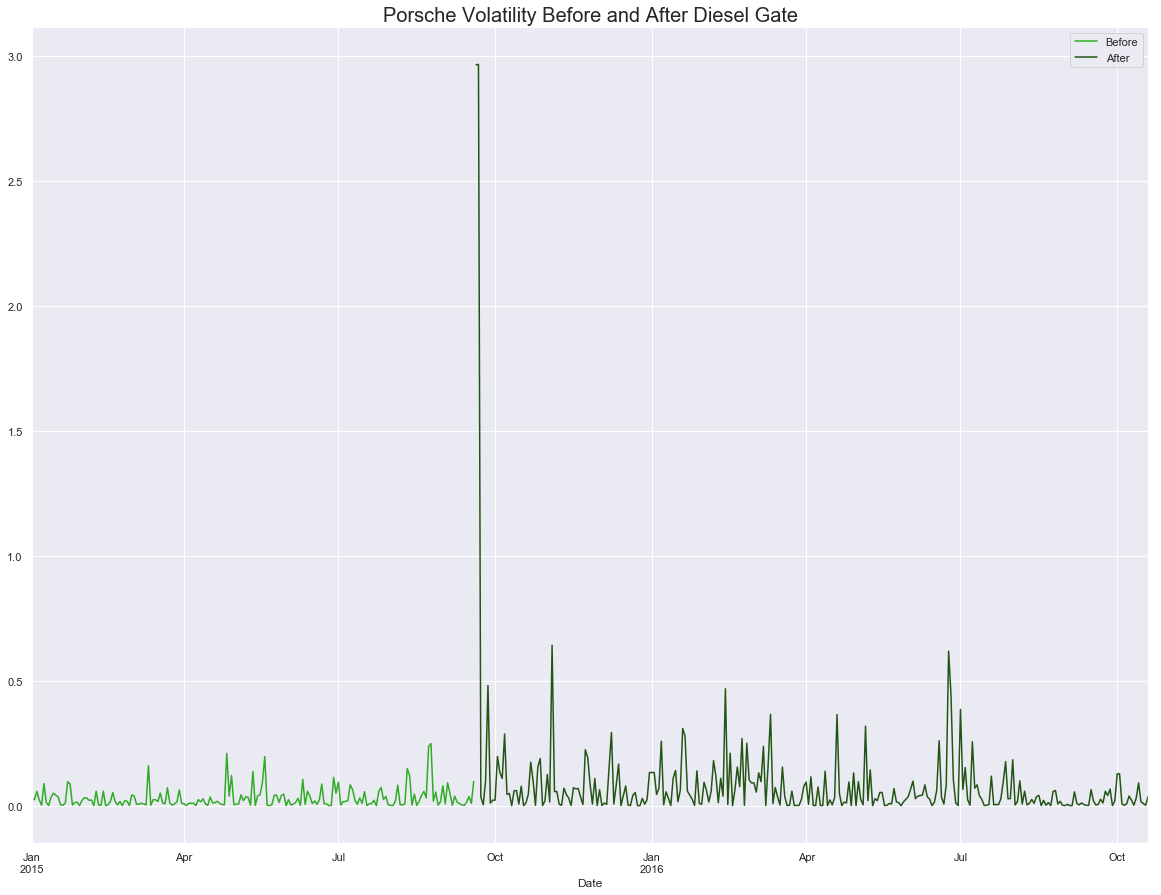

In [49]:
df['2ret_por'][end_date:diesel_gate].plot(figsize=(20,15),color = '#2FAB25')
df['2ret_por'][diesel_gate:dg_end_date].plot(color = '#225414') 
plt.legend(['Before', "After","Volkswagen"])
plt.title('Porsche Volatility Before and After Diesel Gate', size=20)
plt.show()

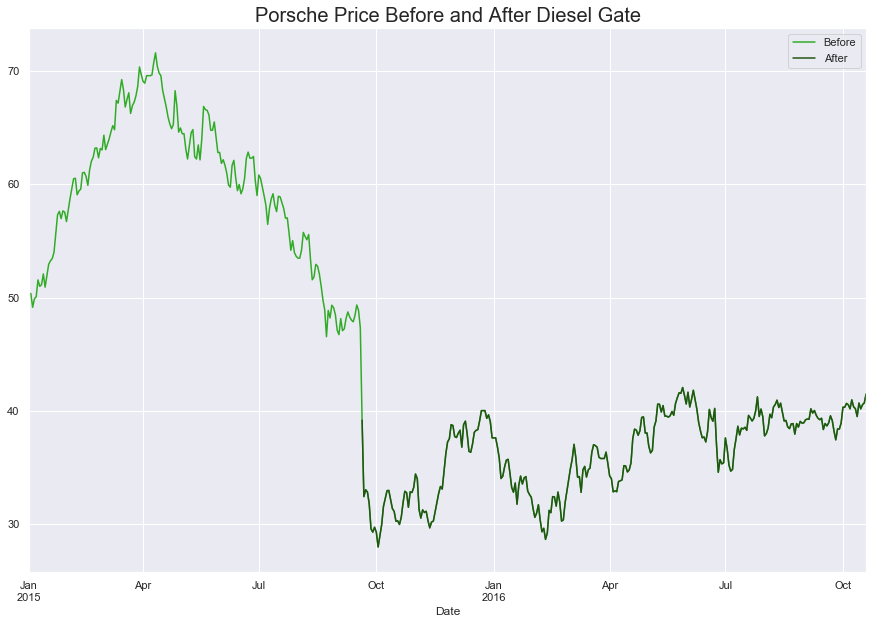

In [50]:
df.por[end_date:dg_end_date].plot(figsize=(15,10), color= '#2FAB25')
df.por[diesel_gate:dg_end_date].plot(color = '#225414')
plt.legend(['Before', "After"])
plt.title('Porsche Price Before and After Diesel Gate', size=20)
plt.show()

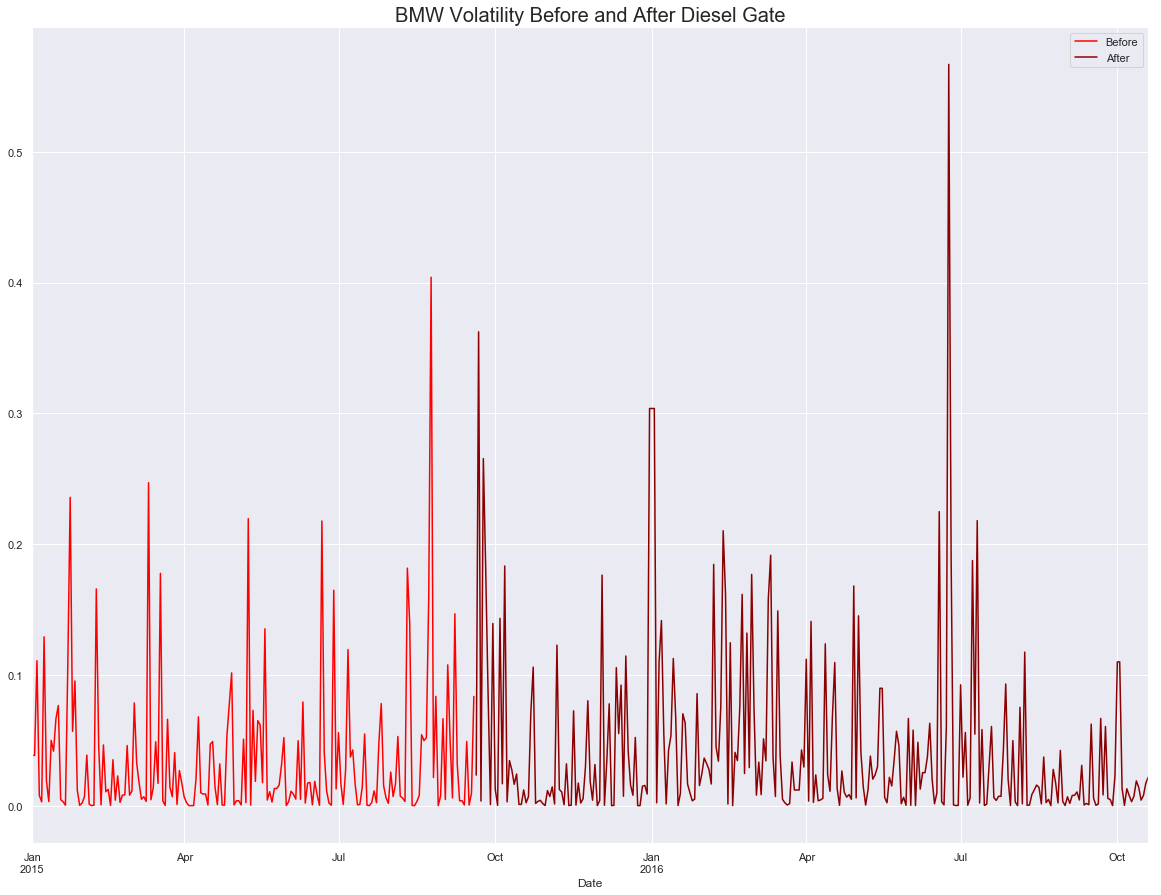

In [51]:
df['2ret_bmw'][end_date:diesel_gate].plot(figsize=(20,15),color = "#FF0000")
df['2ret_bmw'][diesel_gate:dg_end_date].plot(color = "#8B0000")
plt.legend(['Before', "After","Volkswagen"])
plt.title('BMW Volatility Before and After Diesel Gate', size=20)
plt.show()